In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/hackathon/hackathon')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder

In [4]:
df_duration = pd.read_csv('updated_file_with_call_duration.csv')
df_atone = pd.read_csv('customer sentiment.csv')   #atone is agent tone

In [5]:
print(df_duration.head())
print(df_atone.head())

      call_id  customer_id  agent_id  call_start_datetime  \
0  4667960400   2033123310    963118  2024-07-31 23:56:00   
1  1122072124   8186702651    519057  2024-08-01 00:03:00   
2  6834291559   2416856629    158319  2024-07-31 23:59:00   
3  2266439882   1154544516    488324  2024-08-01 00:05:00   
4  1211603231   5214456437    721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0           8/1/2024 0:03  2024-08-01 00:34:00   
1           8/1/2024 0:06  2024-08-01 00:18:00   
2           8/1/2024 0:07  2024-08-01 00:26:00   
3           8/1/2024 0:10  2024-08-01 00:17:00   
4           8/1/2024 0:14  2024-08-01 00:23:00   

                                     call_transcript  call_duration  
0  \n\nAgent: Thank you for calling United Airlin...           38.0  
1  \n\nAgent: Thank you for calling United Airlin...           15.0  
2  \n\nAgent: Thank you for calling United Airlin...           27.0  
3  \n\nAgent: Thank you for calling United Airlin...

In [6]:
merged_df = pd.merge(df_duration, df_atone, on='call_id')
print(merged_df.head())

      call_id  customer_id  agent_id_x  call_start_datetime  \
0  4667960400   2033123310      963118  2024-07-31 23:56:00   
1  1122072124   8186702651      519057  2024-08-01 00:03:00   
2  6834291559   2416856629      158319  2024-07-31 23:59:00   
3  2266439882   1154544516      488324  2024-08-01 00:05:00   
4  1211603231   5214456437      721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0           8/1/2024 0:03  2024-08-01 00:34:00   
1           8/1/2024 0:06  2024-08-01 00:18:00   
2           8/1/2024 0:07  2024-08-01 00:26:00   
3           8/1/2024 0:10  2024-08-01 00:17:00   
4           8/1/2024 0:14  2024-08-01 00:23:00   

                                     call_transcript  call_duration  \
0  \n\nAgent: Thank you for calling United Airlin...           38.0   
1  \n\nAgent: Thank you for calling United Airlin...           15.0   
2  \n\nAgent: Thank you for calling United Airlin...           27.0   
3  \n\nAgent: Thank you for calling 

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df['tone_of_agent'] = label_encoder.fit_transform(merged_df['agent_tone'])

print(merged_df[['agent_tone', 'tone_of_agent']].head())

  agent_tone  tone_of_agent
0    neutral              3
1       calm              1
2    neutral              3
3    neutral              3
4    neutral              3


In [8]:
correlation = merged_df['call_duration'].corr(merged_df['tone_of_agent'])
print(f"Correlation between call_duration and primary_call_reason: {correlation}")

Correlation between call_duration and primary_call_reason: 0.06762742167517523


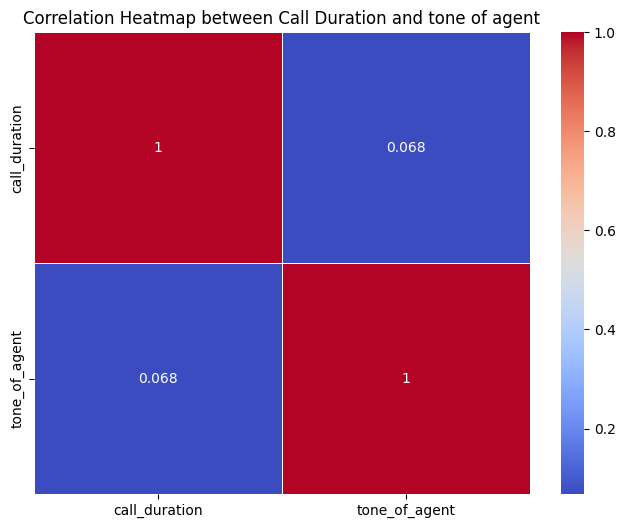

In [9]:
correlation_matrix = merged_df[['call_duration', 'tone_of_agent']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap between Call Duration and tone of agent')
plt.show()